<a href="https://www.kaggle.com/code/hanifcahyoprasetyo/diabetes-kelompok-7?scriptVersionId=200565528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kelompok 7
## 1. Muhammad Iqbal Ali Sa'idil Muna (24/550105/NPA/19962)
## 2. Hanif Cahyo Prasetyo (24/550107/NPA/19964)
## 3. Zulfia Dwi Al Syalwa (22/497584/PA/21428)
## 4. Alif Rafi Tulusena (22/498119/PA/21484)
## 5. Kawakib Nurin Mubaraka (22/498440/PA/21518)
## 6. Fitriansyah Eka Putra (22/504395/PA/21696)

<div class="table-of-contents" style="background-color:#FEFAE0; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#BC6C25;">TOC</h1>
  <ul style="list-style-type: none;">
    <li><a href="#1" style="color: #BC6C25;" >1. Multilayer Perceptron</a></li>
    <li><a href="#2" style="color: #BC6C25;">2. Imports</a></li>
    <li><a href="#3" style="color: #BC6C25;">3. Data Analysis</a></li>
    <li><a href="#4" style="color: #BC6C25;">4. Data Preprocessing</a></li>
      <li><a href="#5" style="color: #BC6C25;">5. Model Implementation Helper Functions </a></li>
    <li><a href="#6" style="color: #BC6C25;">6. Model Implementation</a></li>
    <li><a href="#7" style="color: #BC6C25;">7. Evaluation</a></li>
    <li><a href="#8" style="color: #BC6C25;">8. Hyperparameter</a></li>  
    <li><a href="#8" style="color: #BC6C25;">9. Thank You</a></li>  
  </ul>
</div>

<a id="1"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Multilayer Perceptron</center></h1>



<a id="2"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Imports</center></h1>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<a id="3"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Data Analysis</center></h1>

# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2021.csv')

In [3]:
print(f"Shape: {df.shape}")
print(f"\nDataset in a nutshell:")
df.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

Shape: (67136, 22)

Dataset in a nutshell:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1,0.000000,1,33.000000,0.000000,0.000000,0.000000,1,1,1,0,1,0.000000,2.000000,15.000000,0.000000,1.000000,1,7,6.000000,9.000000
1,0.000000,0,1.000000,1,27.000000,1.000000,0.000000,0.000000,1,0,0,0,1,0.000000,2.000000,1.000000,2.000000,0.000000,1,7,6.000000,6.000000
2,0.000000,0,1.000000,1,26.000000,1.000000,0.000000,0.000000,0,0,0,0,1,0.000000,3.000000,0.000000,30.000000,0.000000,1,13,4.000000,3.000000
3,0.000000,0,0.000000,1,19.000000,1.000000,0.000000,0.000000,1,1,1,0,1,0.000000,3.000000,0.000000,0.000000,0.000000,0,11,5.000000,7.000000
4,0.000000,1,0.000000,1,37.000000,0.000000,0.000000,0.000000,1,1,1,0,1,0.000000,2.000000,0.000000,0.000000,0.000000,0,5,5.000000,3.000000


In [4]:
# Mengubah seluruh kolom menjadi int64
df = df.astype('int64')

In [5]:
print(f"Shape: {df.shape}")
print(f"\nDataset in a nutshell:")
df.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

Shape: (67136, 22)

Dataset in a nutshell:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,33,0,0,0,1,1,1,0,1,0,2,15,0,1,1,7,6,9
1,0,0,1,1,27,1,0,0,1,0,0,0,1,0,2,1,2,0,1,7,6,6
2,0,0,1,1,26,1,0,0,0,0,0,0,1,0,3,0,30,0,1,13,4,3
3,0,0,0,1,19,1,0,0,1,1,1,0,1,0,3,0,0,0,0,11,5,7
4,0,1,0,1,37,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5,5,3


In [6]:
print(f"Informations:\n")
print(df.info())

Informations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       67136 non-null  int64
 1   HighBP                67136 non-null  int64
 2   HighChol              67136 non-null  int64
 3   CholCheck             67136 non-null  int64
 4   BMI                   67136 non-null  int64
 5   Smoker                67136 non-null  int64
 6   Stroke                67136 non-null  int64
 7   HeartDiseaseorAttack  67136 non-null  int64
 8   PhysActivity          67136 non-null  int64
 9   Fruits                67136 non-null  int64
 10  Veggies               67136 non-null  int64
 11  HvyAlcoholConsump     67136 non-null  int64
 12  AnyHealthcare         67136 non-null  int64
 13  NoDocbcCost           67136 non-null  int64
 14  GenHlth               67136 non-null  int64
 15  MentHlth              67136 non-null  

In [7]:
print(f"Is null:")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#FEFAE0","color":"#BC6C25","border": "1.5px  solid black"})

Is null:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="4"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Data Preprocessing</center></h1>

# Data Preprocessing
  

## Check Duplicate

In [9]:
dup = df[df.duplicated()].shape[0]
print(f"Duplicate Count: {dup} / Entries: {df.shape[0]}")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries: {df.shape[0]} entries exists.")

Duplicate Count: 737 / Entries: 67136

After removing duplicate entries: 66399 entries exists.


In [10]:
df_temp = df.copy()
df_temp.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,33,0,0,0,1,1,1,0,1,0,2,15,0,1,1,7,6,9
1,0,0,1,1,27,1,0,0,1,0,0,0,1,0,2,1,2,0,1,7,6,6
2,0,0,1,1,26,1,0,0,0,0,0,0,1,0,3,0,30,0,1,13,4,3
3,0,0,0,1,19,1,0,0,1,1,1,0,1,0,3,0,0,0,0,11,5,7
4,0,1,0,1,37,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5,5,3


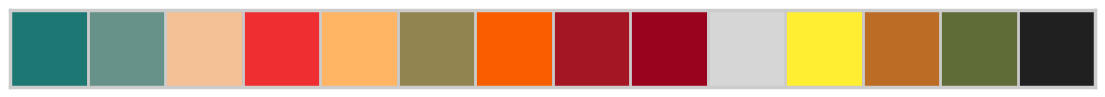

In [11]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#BC6C25","#606C38","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

In [12]:
df_temp_pos = df_temp[df_temp["Diabetes_binary"] == 1]
df_temp_pos.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
33568,1,1,0,1,28,0,0,1,0,1,0,0,1,0,2,0,0,0,0,11,4,3
33569,1,1,1,1,33,0,0,0,1,1,1,0,1,0,2,10,0,0,0,9,4,7
33570,1,0,1,1,29,0,1,1,1,1,1,0,1,0,5,0,30,1,1,12,3,4
33571,1,0,0,1,24,0,0,1,0,0,1,0,1,0,4,0,0,0,1,12,6,7
33572,1,0,0,1,33,1,0,0,1,0,1,0,1,0,4,0,0,0,1,6,5,2


## Age Distribution of Positive Cases

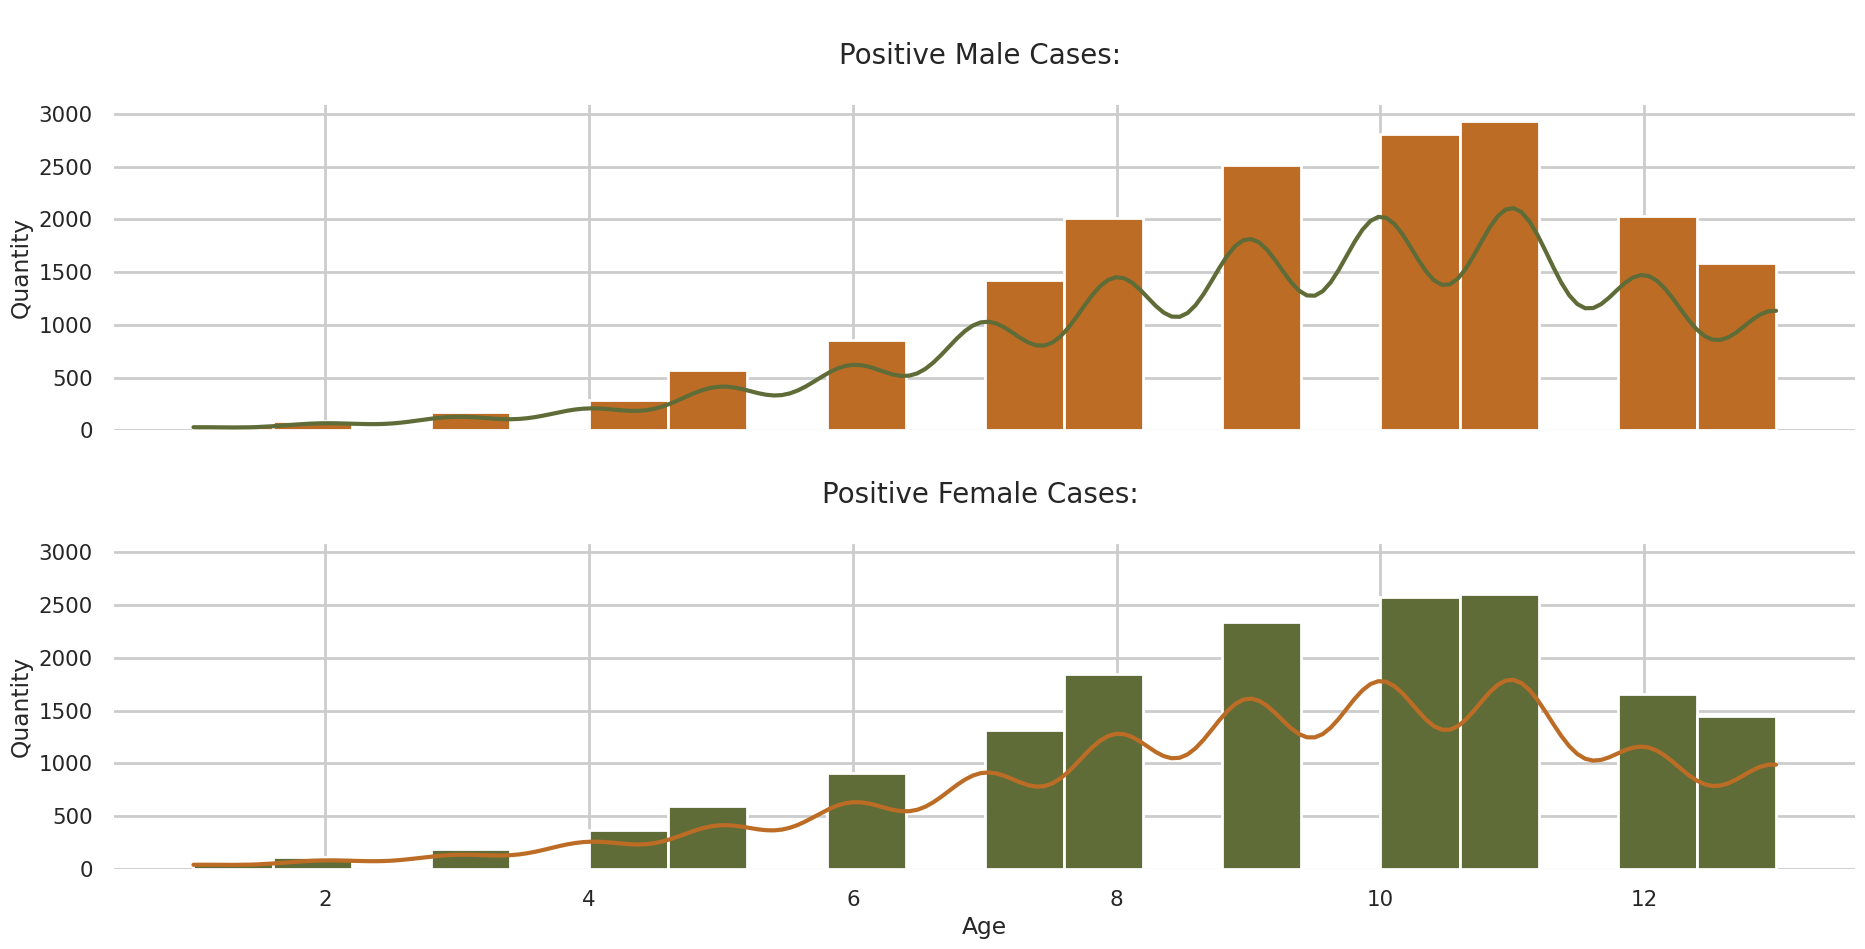

In [13]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(df_temp_pos[df_temp_pos["Sex"]==1]["Age"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases: \n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(df_temp_pos[df_temp_pos["Sex"]==0]["Age"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases: \n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

## Gender Distribution of Positive Cases

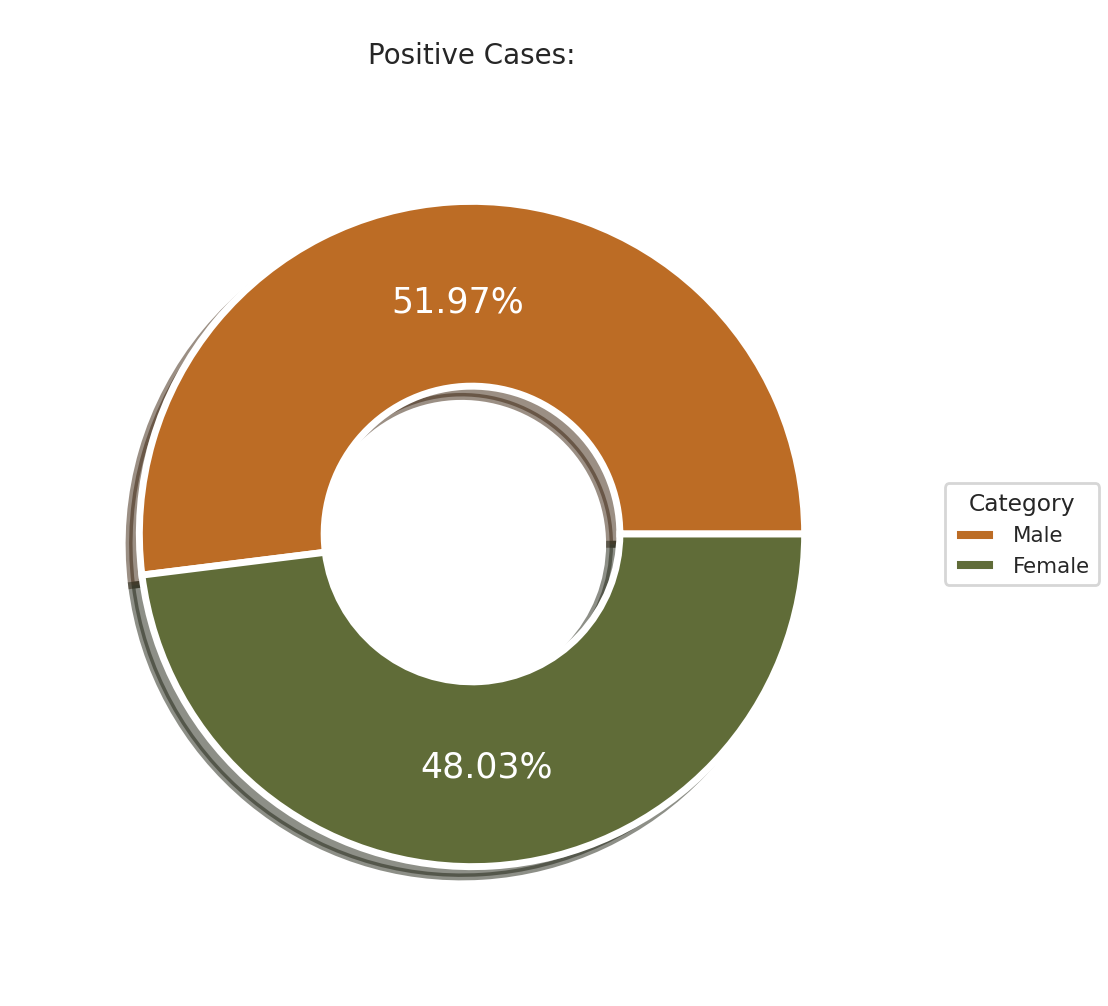

In [14]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(df_temp_pos[df_temp_pos["Sex"]==1]["Sex"]),
                                    len(df_temp_pos[df_temp_pos["Sex"]==0]["Sex"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#BC6C25","#606C38"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases:",fontsize=20)
plt.show()

## Get highly correlated features

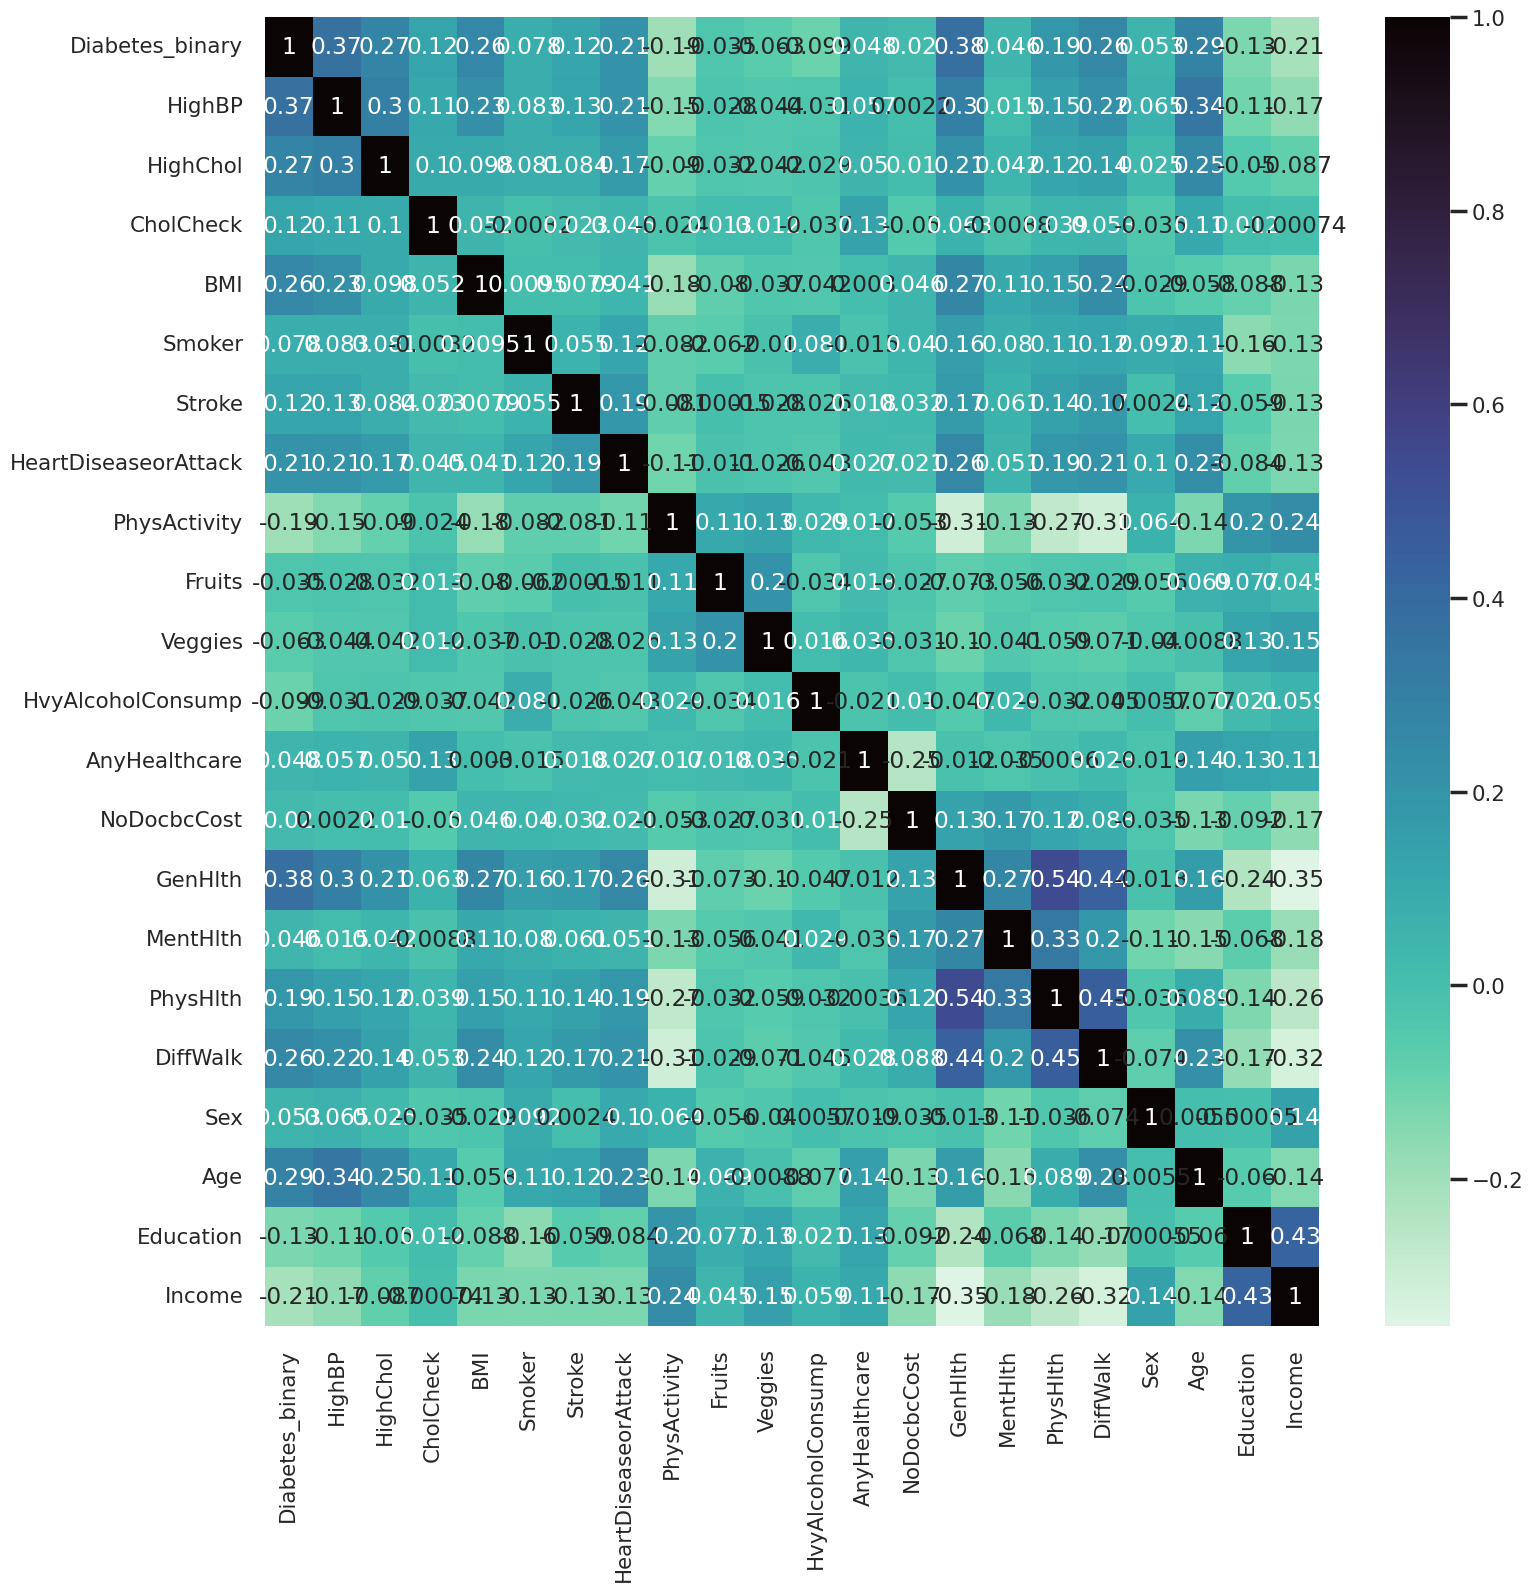

In [15]:
corr = df.corr()
plt.figure(figsize=(17,17))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [16]:
# Get the absolute value of the correlation
cor_target = abs(corr["Diabetes_binary"])

# Select highly correlated features (thresold = 0.1)
relevant_features = cor_target[cor_target>0.1]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('Diabetes_binary')

# Display the results
print(names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


## Asign Data and Label

In [17]:
X = df[names].values
y = df['Diabetes_binary'].values

In [18]:
# Step 1: Split data menjadi 60% training dan 40% (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split data sementara menjadi 20% testing dan 20% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: StandardScaler untuk scaling data
scaler = StandardScaler()

In [19]:
# Fit scaler di training data dan transform semua dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [20]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Validation set size:", X_val.shape)

Training set size: (39839, 13)
Testing set size: (13280, 13)
Validation set size: (13280, 13)


<a id="5"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Model Implementation Helper Functions</center></h1>

# Model Implementation Helper Functions
  

## Imports

In [23]:
!pip install keras-tuner --upgrade

In [37]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

## Multi Layer Perceptron 

In [25]:
# Build a deep learning model (MLP)
model_MLP = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model_MLP.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

## Multi Layer Perceptron Dropout 0.3

In [26]:
# Build a deep learning model (MLP)
model_MLP_Dropout = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model_MLP_Dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

## Multi Layer Perceptron Dropout 0.3 Kernel Regularizer 0.001

In [27]:
model_MLP_Droupout_l2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_MLP_Droupout_l2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

<a id="6"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Model Implementation</center></h1>

# Model Implementation 
  

## Multi Layer Perceptron

In [28]:
# Compile the model
model_MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting during tuning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history_model_MLP = model_MLP.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model_MLP.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/1000


I0000 00:00:1728713692.207126     249 service.cc:145] XLA service 0x7f23d8004ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728713692.207185     249 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728713692.207189     249 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


104/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7017 - loss: 0.5731

I0000 00:00:1728713694.412874     249 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7247 - loss: 0.5457 - val_accuracy: 0.7407 - val_loss: 0.5227
Epoch 2/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7445 - loss: 0.5207 - val_accuracy: 0.7405 - val_loss: 0.5193
Epoch 3/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7436 - loss: 0.5161 - val_accuracy: 0.7395 - val_loss: 0.5209
Epoch 4/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7470 - loss: 0.5137 - val_accuracy: 0.7409 - val_loss: 0.5216
Epoch 5/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7475 - loss: 0.5152 - val_accuracy: 0.7422 - val_loss: 0.5205
Epoch 6/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7463 - loss: 0.5155 - val_accuracy: 0.7392 - val_loss: 0.5221
Epoch 7/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7494 - loss: 0.5137 - val_accuracy: 0.7408 - val_loss: 0.5191
Epoch 8/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.5117 - val_accuracy:

## Multi Layer Perceptron Dropout 0.3

In [29]:
# Compile the model
model_MLP_Dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting during tuning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history_model_MLP_Dropout = model_MLP.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model_MLP_Dropout.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7509 - loss: 0.5119 - val_accuracy: 0.7416 - val_loss: 0.5185
Epoch 2/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.5067 - val_accuracy: 0.7411 - val_loss: 0.5195
Epoch 3/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7520 - loss: 0.5071 - val_accuracy: 0.7433 - val_loss: 0.5187
Epoch 4/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.5074 - val_accuracy: 0.7410 - val_loss: 0.5210
Epoch 5/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7505 - loss: 0.5083 - val_accuracy: 0.7390 - val_loss: 0.5208
Epoch 6/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7498 - loss: 0.5070 - val_accuracy: 0.7401 - val_loss: 0.5206
Epoch 7/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7492 - loss: 0.5105 - val_accuracy: 0.7425 - val_loss: 0.5214
Epoch 8/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7533 - loss: 0.5079 - 

## Multi Layer Perceptron Dropout 0.3 Kernel Regularizer 0.001

In [30]:
# Compile the model
model_MLP_Droupout_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting during tuning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history_model_MLP_Droupout_l2 = model_MLP_Droupout_l2.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model_MLP_Droupout_l2.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7061 - loss: 0.6646 - val_accuracy: 0.7422 - val_loss: 0.5736
Epoch 2/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7376 - loss: 0.5763 - val_accuracy: 0.7424 - val_loss: 0.5492
Epoch 3/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7449 - loss: 0.5493 - val_accuracy: 0.7426 - val_loss: 0.5387
Epoch 4/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7397 - loss: 0.5441 - val_accuracy: 0.7418 - val_loss: 0.5319
Epoch 5/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7409 - loss: 0.5390 - val_accuracy: 0.7436 - val_loss: 0.5298
Epoch 6/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7409 - loss: 0.5360 - val_accuracy: 0.7449 - val_loss: 0.5279
Epoch 7/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7427 - loss: 0.5344 - val_accuracy: 0.7428 - val_loss: 0.5263
Epoch 8/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7445 - loss: 0.5300 -

<a id="7"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Evaluation</center></h1>

# Evaluation
  

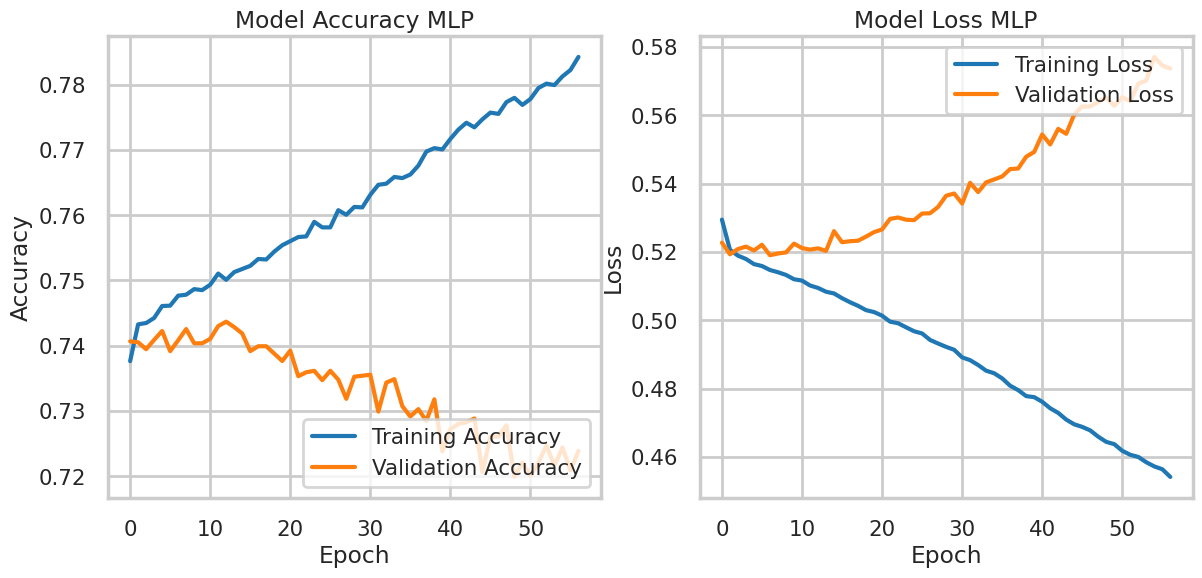

In [31]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_model_MLP.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_model_MLP.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_model_MLP.history['loss'], label='Training Loss')
ax[1].plot(history_model_MLP.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

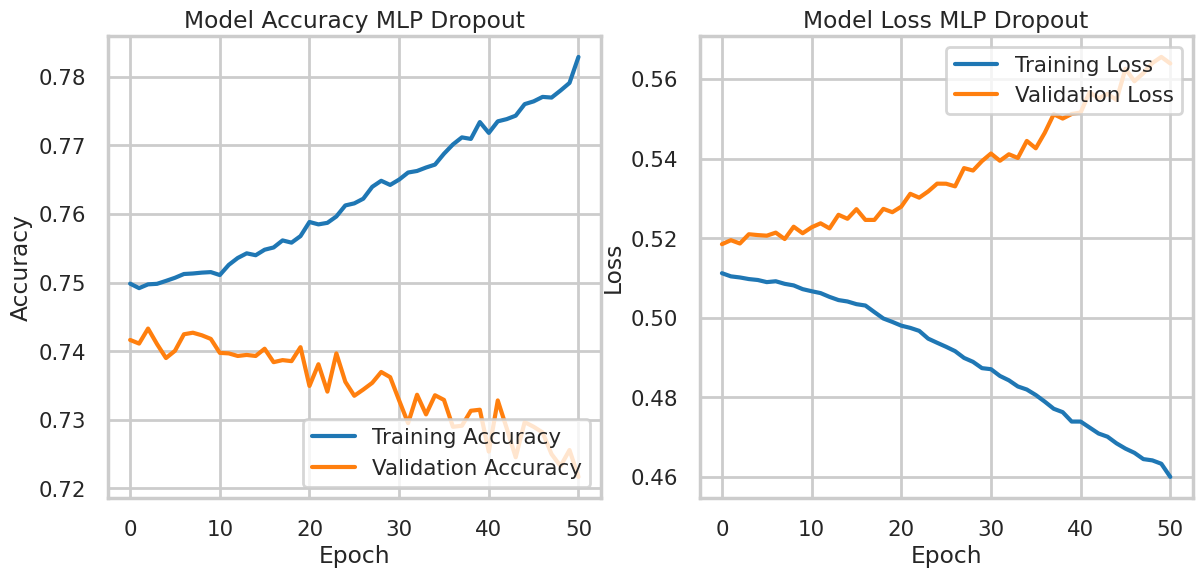

In [34]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_model_MLP_Dropout.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_model_MLP_Dropout.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP Dropout')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_model_MLP_Dropout.history['loss'], label='Training Loss')
ax[1].plot(history_model_MLP_Dropout.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP Dropout')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

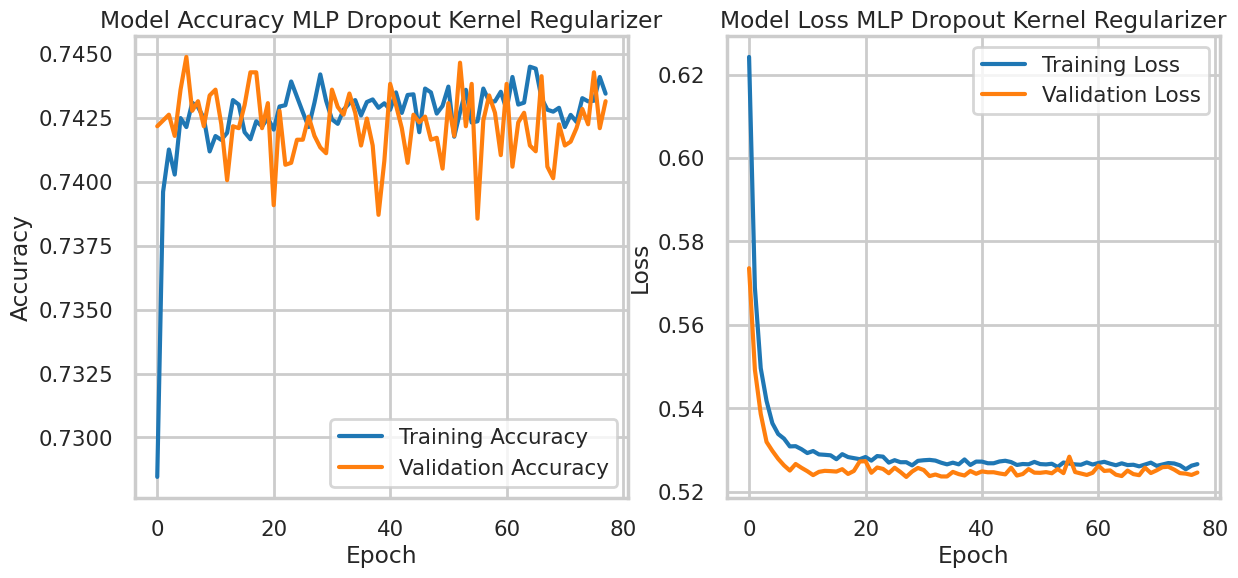

In [35]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_model_MLP_Droupout_l2.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_model_MLP_Droupout_l2.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP Dropout Kernel Regularizer')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_model_MLP_Droupout_l2.history['loss'], label='Training Loss')
ax[1].plot(history_model_MLP_Droupout_l2.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP Dropout Kernel Regularizer')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

<a id="8"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Hyperparameter</center></h1>

# Hyperparameter
  

In [38]:
# Define the model builder function
def build_model(hp):
    model = Sequential()
    
    # First dense layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),  # Tune the number of units
        activation='relu',
        input_dim=X_train.shape[1],
        kernel_regularizer=l2(hp.Float('l2_1', min_value=1e-5, max_value=1e-2, sampling='LOG'))  # Tune L2 regularization
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))  # Tune dropout rate
    
    # Second dense layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=64, step=32),  # Tune the number of units
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_2', min_value=1e-5, max_value=1e-2, sampling='LOG'))  # Tune L2 regularization
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))  # Tune dropout rate
    
    # Third dense layer
    model.add(Dense(32, activation='relu'))  # Fixed layer

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),  # Tune learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Tune for validation accuracy
    max_trials=20,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train each model (1 for simplicity)
    directory='my_dir',  # Directory to save the search results
    project_name='MLP_Dropout_L2_tuning'
)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Get the optimal hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f'Best number of units in the first layer: {best_hps.get("units_1")}')
print(f'Best dropout rate for the first layer: {best_hps.get("dropout_1")}')
print(f'Best L2 regularization for the first layer: {best_hps.get("l2_1")}')
print(f'Best number of units in the second layer: {best_hps.get("units_2")}')
print(f'Best dropout rate for the second layer: {best_hps.get("dropout_2")}')
print(f'Best L2 regularization for the second layer: {best_hps.get("l2_2")}')
print(f'Best learning rate: {best_hps.get("learning_rate")}')

# Build the best model using the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model (you can adjust the number of epochs and batch size)
history_best_model = best_model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Trial 20 Complete [00h 00m 42s]
val_accuracy: 0.744352400302887

Best val_accuracy So Far: 0.7459337115287781
Total elapsed time: 00h 16m 37s
Best number of units in the first layer: 96
Best dropout rate for the first layer: 0.4
Best L2 regularization for the first layer: 4.6902709128145316e-05
Best number of units in the second layer: 32
Best dropout rate for the second layer: 0.30000000000000004
Best L2 regularization for the second layer: 0.0014480522474056058
Best learning rate: 0.00042399224034472463
Epoch 1/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6558 - loss: 0.6841 - val_accuracy: 0.7383 - val_loss: 0.5815
Epoch 2/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7275 - loss: 0.5932 - val_accuracy: 0.7422 - val_loss: 0.5624
Epoch 3/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.5708 - val_accuracy: 0.7430 - val_loss: 0.5537
Epoch 4/1000
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7398 - loss: 0.5590 - val_accu

<a id="9"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Thankyou</center></h1>

# Thankyou
  